In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



Data collection and Processing


In [6]:
# loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv('/gld_price_data.csv')


In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# number of rows and coloumn
gold_data.shape

(2290, 6)

In [10]:
# getting some basic information about the dataframe
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the stastatical measure of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1. Postive
2. Negative

In [26]:
correlation = gold_data.corr()

<Axes: >

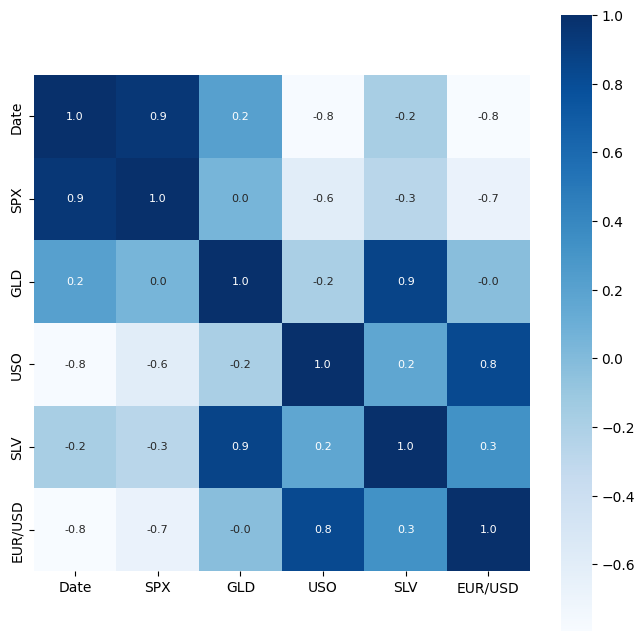

In [33]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues' )

In [34]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


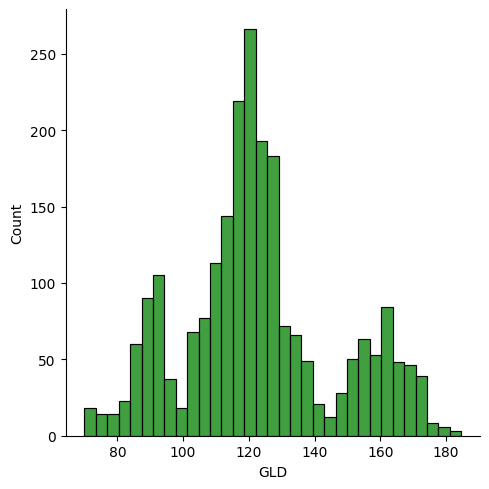

In [35]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [38]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [39]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [40]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Testing Data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

Model Training Random Forest Regressor

In [42]:
regressor = RandomForestRegressor(n_estimators=100)


In [43]:
# Training model
regressor.fit(x_train,y_train)


RandomForestRegressor()

Model Evaluation

In [44]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [45]:
print(test_data_prediction)

[168.56799945  81.94319979 116.09299986 127.52090048 120.41590144
 154.70459792 150.33649855 126.18310088 117.49789877 125.93850091
 116.46790102 171.83670086 141.48619797 167.9883987  115.26220022
 117.47790043 137.94470261 169.96710142 159.06580227 161.09270055
 155.05769998 125.62670043 176.44699977 156.84250352 125.25260051
  93.82850022  77.56590018 120.68790016 119.04709908 167.39900019
  87.9997005  125.47110021  91.10320027 117.73550044 121.11039929
 136.3132009  115.50410128 115.28460085 148.19159954 107.09340096
 104.39230268  87.01319747 126.59650069 117.74560013 152.63269928
 119.71199984 108.31840016 108.27119855  93.01860023 127.14419765
  75.03500026 113.71319913 121.59930024 111.15249935 118.98849924
 120.79369924 160.37020024 168.29470108 147.04359659  85.87519849
  94.12290047  86.80579894  90.59800024 118.87950074 126.45850057
 127.36779944 170.62070074 122.2616994  117.45289874  98.50790039
 167.75600192 142.66589898 132.0970025  121.37990249 120.72939917
 119.80570

In [46]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892800903750015


Compare the actual value and predicted value in a plot

In [48]:
y_test = list(y_test)

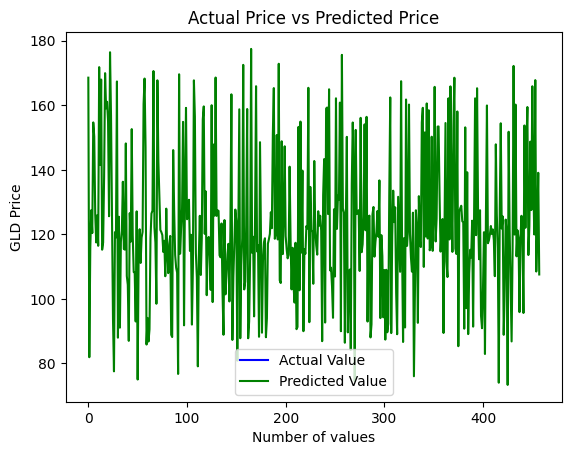

In [49]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()